<h1><center>Reader Genre and Preference</center></h1>

If we know a reader's genre preference, what can we infer about their reading behavior? Let's take a look at data from Goodreads to find out.
Goodreads is a social website that allows users to rate and review the books they've read.

In [1]:
import numpy as np
import math
import DataProcessing as dp
from collections import Counter
from prettytable import PrettyTable as pt

# The Data

The data set consists of 1,065 users with 662,467 ratings between them. The most prolific user rated 8,356 books. The least active rated 74. The mean number of ratings is 419. The users were sampled from raters of 14 titles from seven genres. For each genre, a popular and moderately popular title (determined by the number of ratings on the Goodreads' website as of January 3, 2018. (See the titles in the notes section below). Users with less than 70 ratings were discarded.

In [2]:
# Load the Readers data set
from GR_Data import User

users_data = 'C:/docs/career/projects/goodreads/data/analysis/general/users.txt'
ratings_data = 'C:/docs/career/projects/goodreads/data/analysis/general/ratings.txt'

readers = User.load_users(users_data, ratings_data)
print('Number of Readers in data set: ' + str(len(readers)))

Number of Readers in data set: 1065


Determining the genres of rated books was a bottleneck in the data collection process, so 145 books were sampled from the ratings of each user. If the user rated less than 145 books, then all of their books were included. Nonfiction titles and titles of indeterminate genre were discarded.

In [3]:
print('Sampled Books over Readers:\n')

count = []
for reader in readers:
    count.append(len(reader.samples))
    
count = np.array(count)
values = [count.sum(), count.mean(), count.std(), count.min(), count.max()]

table = pt()
table.field_names = ['total', 'mean', 'standard deviation', 'Min', 'Max']
table.add_row(values)
print(table)

Sampled Books over Readers:

+--------+---------------+--------------------+-----+-----+
| total  |      mean     | standard deviation | Min | Max |
+--------+---------------+--------------------+-----+-----+
| 138516 | 130.061971831 |   21.6750632309    |  17 | 145 |
+--------+---------------+--------------------+-----+-----+


In [4]:
# Variables for analysis and plotting

# Number of readers who prefer each genre
num_by_genre = Counter()
for reader in readers:
    num_by_genre[reader.preference[0]] += 1

# Dict that contains a list of users who prefer each genre
readers_by_genre = dp.div_by_genre(readers)

# np array that contains mean and standard deviation of the proportion of books rated within each genre group
reading_preference = dp.calc_reading_preference(readers_by_genre)

# The top 25% of readers in each genre by the strength of their preference for the genre
genre_loyalists = dp.div_genre_loyalists(readers_by_genre, 0.25)

# Preferences of the top readers in the genre
loyalists_preference = dp.calc_reading_preference(genre_loyalists)

In [5]:
print('Number of readers who show a preference for each genre:\n')
    
table = pt()
table.field_names = list(num_by_genre.keys())
table.add_row(list(num_by_genre.values()))
print(table)

Number of readers who show a preference for each genre:

+-----------------+-------------+-----------------+---------+---------+---------+--------+
| General Fiction | Young Adult | Science Fiction | Fantasy | Romance | Mystery | Horror |
+-----------------+-------------+-----------------+---------+---------+---------+--------+
|       291       |     171     |        66       |   235   |   160   |   125   |   17   |
+-----------------+-------------+-----------------+---------+---------+---------+--------+


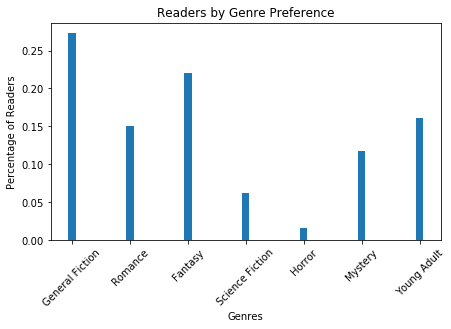

In [9]:
# Visualize the data set
title = 'Readers by Genre Preference'
xlabel = 'Genres'
ylabel = 'Percentage of Readers'
X = [0, 4, 8, 12, 16, 20, 24]
y = []

for genre in dp.genres:
    y.append(np.array(num_by_genre[genre]) / len(readers))
    
plot_users_per_genre(X, y, dp.genres, xlabel, ylabel, title)

# How Strong is Genre Preference?

To answer this, let's delve into the data. Let's separate readers by their preferred genres and see what they're reading as a group. 

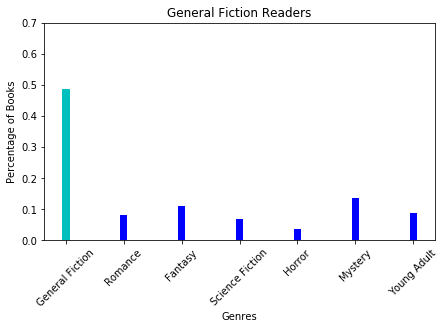

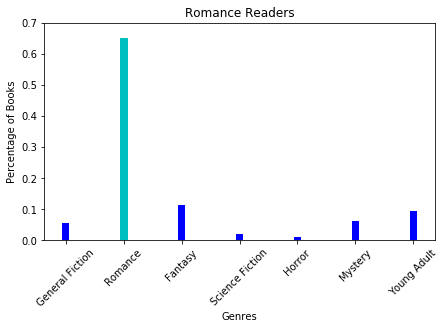

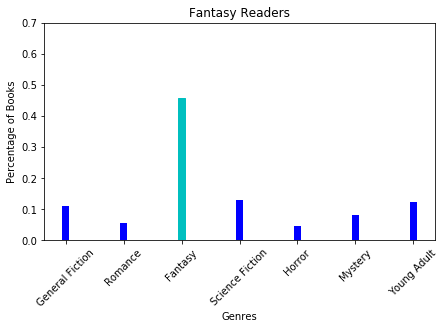

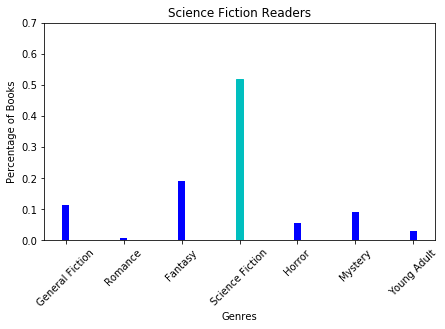

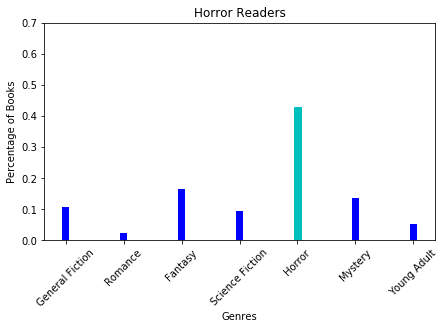

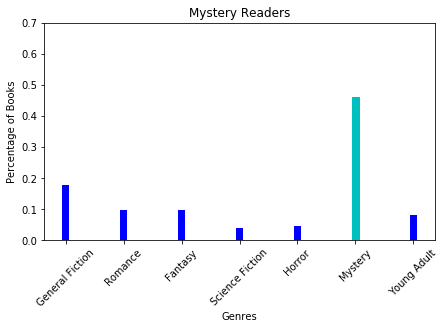

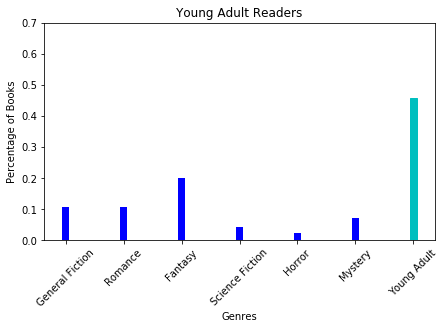

In [10]:
xlabel = 'Genres'
ylabel = 'Percentage of Books'
ymax = 0.7
X = [0, 4, 8, 12, 16, 20, 24]

for i, preference in enumerate(reading_preference):
    y = preference[0]
    title = dp.genres[i] + ' Readers'
    bar_plot(X, y, xlabel, ylabel, ymax, title, i)
    print('\n')

Most of these groups look pretty similar. Roughly 50% of the titles they read are within their preferred genre and they read a smattering of everything else. Romance readers are notable for their loyalty; roughly 65% of the books read in that group are romance. It's interesting that romance readers seem to turn to fantasy and young adult when reading outside of the genre. In a future analysis, I'll dive into subgenres. Is romance a subgenre of the fantasy and young adult read by this group?
Romance readers don't seem to read much horror or sci-fi, and horror and sci-fi readers reciprocate the disinterest. What does that mean for horror and sci-fi books with strong romantic elements? Do they appeal to romance readers?
It's worth noting that fantasy seems to be a second favorite of every group. Mystery readers show a preference for fiction and fiction readers give a small edge to mystery, but even those groups seem to enjoy fantasy. Do they enjoy the same types of fantasy? That's certainly worth more digging.
Young adult fares well outside of its core readership. But I think it's been known since the craze of Harry Potter that these books aren't exclusively for kids.
Let's take a look at the popularity of each genre outside of its group.

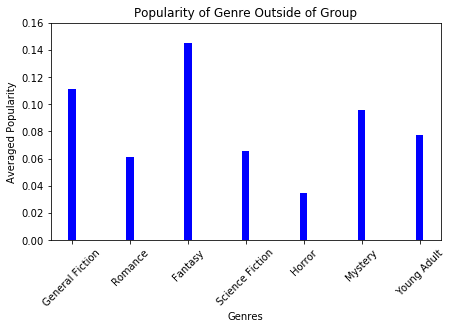

In [11]:
# Calculate the average popularity of each genre by readers outside of its preference group
popularity_matrix = []
for genre in reading_preference:
    popularity_matrix.append(genre[0])
popularity_matrix = np.array(popularity_matrix)
# Calculate the mean of each group's popularity excluding the values within its own group
popularity = popularity_matrix.sum(axis=0)
popularity = (popularity - np.diagonal(popularity_matrix)) / (popularity_matrix.shape[0] - 1)

title = 'Popularity of Genre Outside of Group'
xlabel = 'Genres'
ylabel = 'Averaged Popularity'
ymax = 0.16
X = [0, 4, 8, 12, 16, 20, 24]
y = popularity
bar_plot(X, y, xlabel, ylabel, ymax, title)

# Super Loyalists

So far, we've looked at behavior averaged over groups. Do the patterns hold when we look at the members of each group who are most loyal to their genre? Let's look at the top 25% most genre-loyal readers.

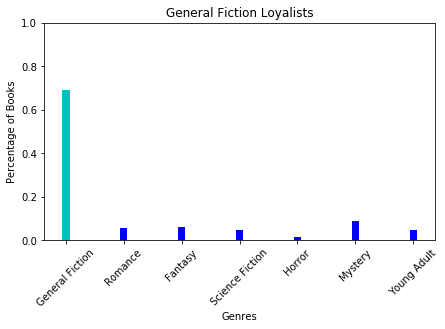

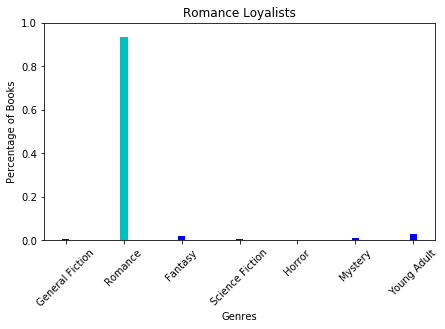

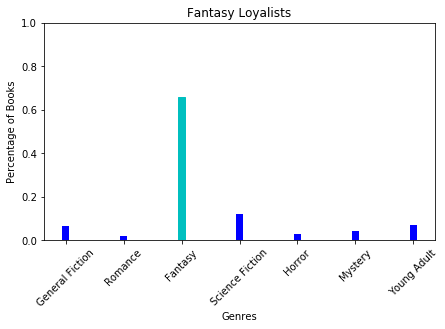

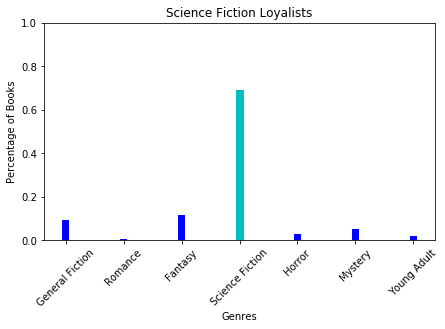

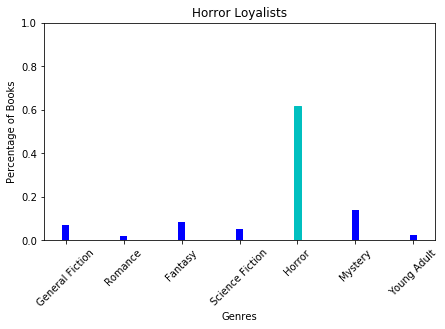

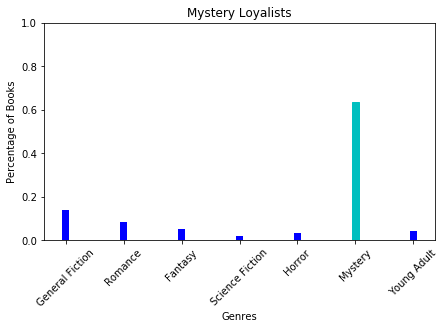

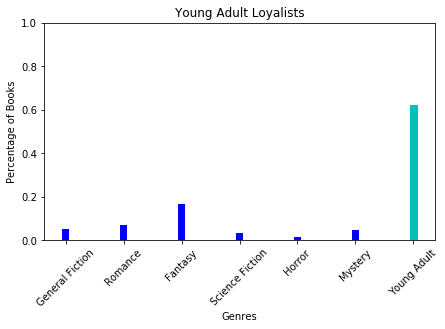

In [13]:
# Super Loyalists
xlabel = 'Genres'
ylabel = 'Percentage of Books'
ymax = 1.0
X = [0, 4, 8, 12, 16, 20, 24]

for i, preference in enumerate(loyalists_preference):
    y = preference[0]
    title = dp.genres[i] + ' Loyalists'
    bar_plot(X, y, xlabel, ylabel, ymax, title, i)
    print('\n')

# Notes

## Determining a Book's Genre

Goodreads allows users to place books on named shelves such as Romance, Fantasy, and Urban Fantasy. I determined the genre of each book based on the shelves it was placed on and the number of users who placed it there.
The following keywords took first precedence:
<br>
<center>Nonfiction, Comics, Graphic Novels, Childrens</center>

If a book appeared on any of these shelves, it was excluded.
The following keywords took second precedence:
<br>
<center>Romance, Category Romance, Fantasy, Science Fiction, Horror, Mystery, Young Adult</center>

If a book was placed on one of these shelves, it was assigned the corresponding genre. If the book was placed on more than one of these shelves, the shelf with the greater number of users took precedence (i.e. 500 users place it in Romance; 1000 users place it in Mystery; assignment equals Mystery).
The following keywords took third precedence:
<br>
<center>Fiction, Classics, Literary Fiction, Womens Fiction</center>

Any book placed on one of these shelves without an accompanying genre was categorized as General Fiction.
Sampling Users

Titles from which readers were sampled with number of ratings on January 3, 2018:

| Title | Genre | Number of Ratings |
|:------|:------:|:-----------------:|
| Gone Girl | Mystery | 1,696,469 |
| Never Let You Go| Mystery | 9,742 |
| The Magician’s Land | Fantasy | 46,812 |
| The Stone Sky | Fantasy | 11,141 |
| Ready Player One | Science Fiction | 481,302 |
| Apex | Science Fiction | 4,893 | 
| Allegiant | Young Adult | 683,200 |
| Little Monsters | Young adult | 2,351 |
| Vision in White | Romance | 110,358 |
| Temporary | Romance | 1,220 |
| Freedom | Fiction | 133,538 |
| My Name is Lucy Barton | Fiction| 73,632 |

In [8]:
import matplotlib.pyplot as plt

# Plotting functions
def plot_users_per_genre(X, Y, genres, xlabel, ylabel, title):
    plt.figure(figsize=(7,4))
    plt.bar(X, Y, width=0.5, tick_label=dp.genres)
    plt.xticks(X, dp.genres, rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(title + '.png', bbox_inches='tight')
    plt.show()
    
def bar_plot(X, y, xlabel, ylabel, ymax, title, index=-1):
    plt.figure(figsize=(7,4))
    p = (plt.bar(X, y, width=0.5, color='b', tick_label=dp.genres))
    if index > - 1:
        p[index].set_color('c')
    plt.xticks(X, dp.genres, rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim( (0, ymax) )
    plt.savefig(title + '.png', bbox_inches='tight')
    plt.show()

Again, romance readers stand out. Unlike every other group, their loyalists read almost nothing else! Young adult edges out fantasy among these readers, but both numbers are tiny. The loyalists of other genres look a lot like their less loyal counterparts, just more loyal.

# What's Missing?

We've looked at the behavior of readers grouped by preferred genre. We've even looked at the behavior of the most genre-loyal readers. Asking more questions than we've answered aside, something is missing here. We've ignored a key part of our data that might further illuminate reading behavior. Have you figured it out? Right. Exactly. We didn't look at ratings. How do groups of readers rate books outside of their preferred genre? Will we find that horror novel ratings amongst romance readers are stellar, suggesting that romance readers are extra picky about reading horror and only pick up ones they're guaranteed to like? Or will we find that horror novel ratings amongst romance readers are abysmal, suggesting that each horror novel read is a cautionary tale not to read another? I can't wait to find out.
Coming soon...

In [7]:
%%javascript
// Turn off auto-scrolling in notebook
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>